In [ ]:
!git clone https://git.wur.nl/koots006/msc-course-machine-learning.git data

Cloning into 'data'...
remote: Enumerating objects: 497, done.
remote: Counting objects: 100% (451/451), done.
remote: Compressing objects: 100% (445/445), done.
remote: Total 497 (delta 4), reused 451 (delta 4), pack-reused 46
Receiving objects: 100% (497/497), 36.40 MiB | 13.18 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics.cluster import contingency_matrix

# Step 1: investigation of the data and cluster analysis

In [ ]:
# Load the data
file_path = "data/other_data/data_tomato_spectra/spectra_lab_ABC.csv"
variety_ABC = pd.read_csv(file_path, index_col=0)
variety_A = variety_ABC.loc[variety_ABC["variety"]=="A", :]
variety_B = variety_ABC.loc[variety_ABC["variety"]=="B", :]
variety_C = variety_ABC.loc[variety_ABC["variety"]=="C", :]

In [ ]:
variety_ABC.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V143,V144,V145,V146,V147,V148,V149,V150,brix,variety
A001_1,0.075275,0.069370,0.064641,0.060431,0.057323,0.055988,0.056681,0.058021,0.059118,0.060701,...,0.318478,0.317456,0.316079,0.313968,0.311108,0.307578,0.304603,0.302995,6.6,A
A001_2,0.068783,0.062861,0.058301,0.054222,0.050796,0.048967,0.048927,0.049590,0.049977,0.050934,...,0.305327,0.304267,0.302980,0.301190,0.298808,0.295792,0.293174,0.291660,6.9,A
A001_3,0.066317,0.060498,0.055235,0.050274,0.046474,0.044479,0.044409,0.044890,0.044987,0.045777,...,0.317960,0.316759,0.315418,0.313772,0.311660,0.308953,0.306541,0.305041,7.1,A
A001_4,0.065004,0.059405,0.055291,0.051127,0.047014,0.044477,0.044002,0.044395,0.044416,0.044983,...,0.320998,0.319785,0.318468,0.316950,0.315067,0.312798,0.310905,0.309893,7.5,A
A001_5,0.062342,0.056524,0.051341,0.046394,0.042516,0.040592,0.040536,0.040919,0.040876,0.041491,...,0.316892,0.315493,0.314007,0.312479,0.310787,0.308969,0.307541,0.306879,7.8,A


To get the spectral data (the predictors):

In [ ]:
variety_A.loc[:,'V1':'V150']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150
A001_1,0.075275,0.069370,0.064641,0.060431,0.057323,0.055988,0.056681,0.058021,0.059118,0.060701,...,0.319246,0.319095,0.318478,0.317456,0.316079,0.313968,0.311108,0.307578,0.304603,0.302995
A001_2,0.068783,0.062861,0.058301,0.054222,0.050796,0.048967,0.048927,0.049590,0.049977,0.050934,...,0.306445,0.306073,0.305327,0.304267,0.302980,0.301190,0.298808,0.295792,0.293174,0.291660
A001_3,0.066317,0.060498,0.055235,0.050274,0.046474,0.044479,0.044409,0.044890,0.044987,0.045777,...,0.319494,0.318905,0.317960,0.316759,0.315418,0.313772,0.311660,0.308953,0.306541,0.305041
A001_4,0.065004,0.059405,0.055291,0.051127,0.047014,0.044477,0.044002,0.044395,0.044416,0.044983,...,0.322672,0.321954,0.320998,0.319785,0.318468,0.316950,0.315067,0.312798,0.310905,0.309893
A001_5,0.062342,0.056524,0.051341,0.046394,0.042516,0.040592,0.040536,0.040919,0.040876,0.041491,...,0.318924,0.318004,0.316892,0.315493,0.314007,0.312479,0.310787,0.308969,0.307541,0.306879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A028_9,0.043988,0.039226,0.036280,0.033677,0.030977,0.029342,0.028934,0.028974,0.028558,0.029033,...,0.309004,0.308007,0.306879,0.305520,0.304093,0.302690,0.301258,0.299957,0.299104,0.298946
A028_10,0.048854,0.043404,0.040237,0.037737,0.034990,0.033450,0.033252,0.033474,0.033042,0.033532,...,0.323180,0.322027,0.320754,0.319243,0.317620,0.315935,0.314159,0.312493,0.311344,0.311010
A028_11,0.045099,0.038964,0.035268,0.032375,0.029494,0.027861,0.027627,0.027783,0.027381,0.028069,...,0.312090,0.310992,0.309757,0.308259,0.306637,0.305013,0.303409,0.302103,0.301323,0.301254
A028_12,0.046999,0.039999,0.036519,0.034115,0.031126,0.029376,0.028985,0.029171,0.029006,0.029941,...,0.306641,0.305822,0.304763,0.303430,0.301987,0.300518,0.298988,0.297636,0.296822,0.296776


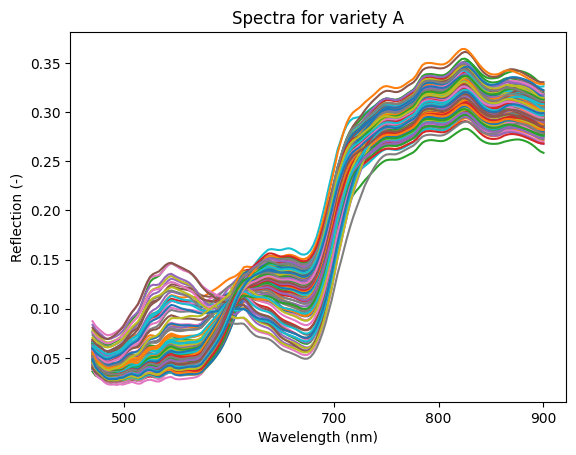

In [ ]:
# Create function to reuse the pl
def plotSpectra(df, titl):
    X = df.loc[:,'V1':'V150']

  # Distribute spectra based on number of bands
    spectra = np.linspace(470, 900, X.shape[1])

  # Plot all the lines
    for i in range(df.shape[0]):
        plt.plot(spectra, X.iloc[i, :].values)
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Reflection (-)")
    plt.title(title)

plotSpectra(variety_A, 'Spectra for variety A')
plt.show()

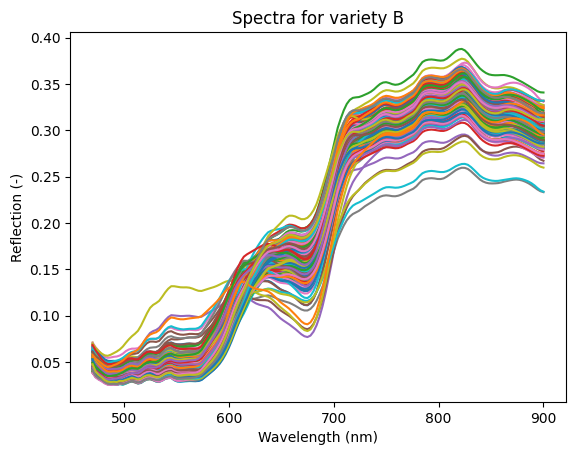

In [ ]:
plotSpectra(variety_B, 'Spectra for variety B')

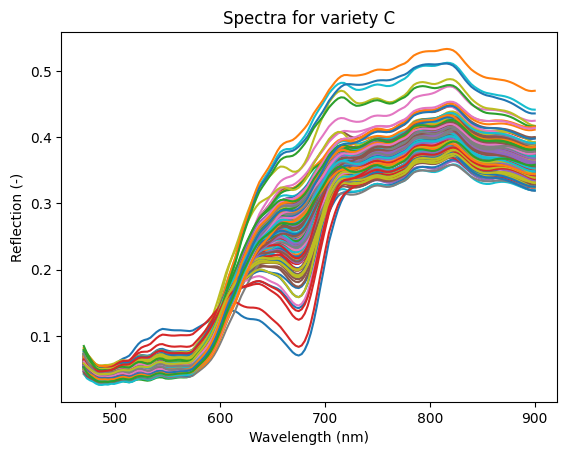

In [ ]:
plotSpectra(variety_C, 'Spectra for variety C')

[]

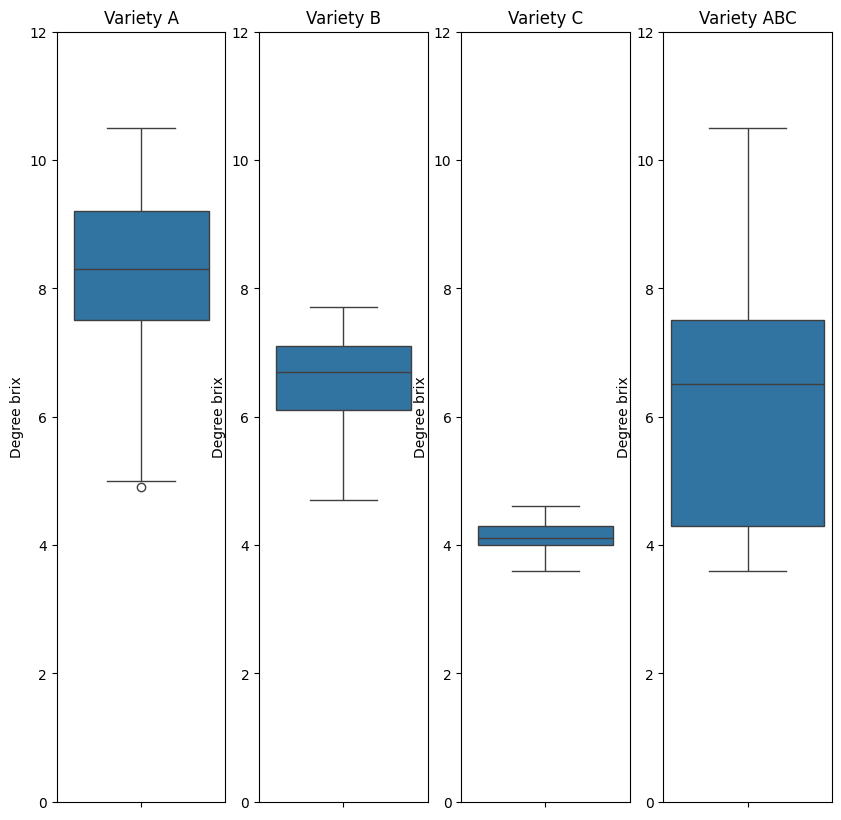

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(10,10))
sns.boxplot(data=variety_A, y='brix', ax=axes[0])
axes[0].set_title('Variety A')
axes[0].set_ylabel('Degree brix')
axes[0].set_ylim(0, 12)

sns.boxplot(data=variety_B, y='brix', ax=axes[1])
axes[1].set_title('Variety B')
axes[1].set_ylabel('Degree brix')
axes[1].set_ylim(0, 12)

sns.boxplot(data=variety_C, y='brix', ax=axes[2])
axes[2].set_title('Variety C')
axes[2].set_ylabel('Degree brix')
axes[2].set_ylim(0, 12)

sns.boxplot(data=variety_ABC, y='brix', ax=axes[3])
axes[3].set_title('Variety ABC')
axes[3].set_ylabel('Degree brix')
axes[3].set_ylim(0, 12)


plt.plot()

In [ ]:
from sklearn.cluster import KMeans
cls = KMeans(n_clusters=3)
X = variety_ABC.loc[:,'V1':'V150']
cls.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
clusters = cls.predict(X)
print(clusters)
print(cls.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 2 0 0 0 2 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 0 0 2
 2 0 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 0 0 0 2 0 2 2 2 2 0 2 0 2 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2
 0 0 2 2 0 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2
 2 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 2 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
def purity_score(true_labels, pred_labels):
  # Get the contingency_matrix (similar to confusion matrix)
  c_mat = contingency_matrix(true_labels, pred_labels)

  print('The contingency matrix:')
  print(pd.DataFrame(c_mat,index=np.unique(true_labels), columns=np.unique(pred_labels)))

  # Calculate the purity of the clusters
  purity_clusters = np.max(c_mat, axis=0) / np.sum(c_mat, axis=0)

  # Print the info
  print('\nPurity of the clusters:')
  print(pd.DataFrame({'purity':purity_clusters}, index=np.unique(pred_labels)))
  print('\nOverall purity:', np.sum(np.amax(c_mat, axis=0)) / np.sum(c_mat))

In [ ]:
purity_score(variety_ABC['variety'],cls.labels_)

The contingency matrix:
     0    1    2
A  185    0   16
B   40    0  169
C    0  174   19

Purity of the clusters:
     purity
0  0.822222
1  1.000000
2  0.828431

Overall purity: 0.8756218905472637


**Comment on findings:**

A purity of 0.87 indicates that K-Means performs well on the dataset, with most of the clusters matching the true category labels.

This could mean that the dataset is relatively well separated in feature space and that the shape of the clusters matches the assumptions of K-Means.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm, Normalize

In [ ]:
gm = GaussianMixture(n_components=3, verbose=2, verbose_interval=1, tol=1e-4).fit(X)
#print("estimated pi, mu, sigma^2 =\n", gm.weights_, gm.means_.T, gm.covariances_.T)
labels = gm.predict(X)

Initialization 0
  Iteration 1	 time lapse 0.16674s	 ll change inf
  Iteration 2	 time lapse 0.02850s	 ll change 0.09479
  Iteration 3	 time lapse 0.03750s	 ll change 0.04965
  Iteration 4	 time lapse 0.03413s	 ll change 0.06655
  Iteration 5	 time lapse 0.02912s	 ll change 0.04211
  Iteration 6	 time lapse 0.04739s	 ll change 0.02595
  Iteration 7	 time lapse 0.03086s	 ll change 0.03578
  Iteration 8	 time lapse 0.03013s	 ll change 0.07707
  Iteration 9	 time lapse 0.02851s	 ll change 0.13556
  Iteration 10	 time lapse 0.04133s	 ll change 0.20822
  Iteration 11	 time lapse 0.02390s	 ll change 0.14664
  Iteration 12	 time lapse 0.01990s	 ll change 0.11380
  Iteration 13	 time lapse 0.01751s	 ll change 0.15588
  Iteration 14	 time lapse 0.02717s	 ll change 0.04080
  Iteration 15	 time lapse 0.03057s	 ll change 0.03075
  Iteration 16	 time lapse 0.03097s	 ll change 0.01218
  Iteration 17	 time lapse 0.03131s	 ll change 0.00206
  Iteration 18	 time lapse 0.05011s	 ll change 0.00080
  Iter

In [ ]:
purity_score(variety_ABC['variety'],labels)

The contingency matrix:
     0    1    2
A    0  201    0
B    0   28  181
C  159    2   32

Purity of the clusters:
     purity
0  1.000000
1  0.870130
2  0.849765

Overall purity: 0.8971807628524047


**Comment on findings:**

GMM performs slightly better than K-Means, which may be due to the fact that the clusters in the dataset are not completely isotropic or the boundaries between the clusters are more ambiguous, and in these cases GMM is able to provide a more flexible definition of the clusters.

# Step 2: multiple linear regression

In [ ]:
def lm_formula(df, dependent_var, excluded_cols=[]):
  '''
  Generates the R style formula for statsmodels (patsy) given
  the dataframe, dependent variable and optional excluded columns
  as strings
  '''
  df_columns = list(df.columns.values)[:-1]
  df_columns.remove(dependent_var)
  for col in excluded_cols:
    df_columns.remove(col)
  return dependent_var + ' ~ ' + ' + '.join(df_columns)

In [ ]:
print(lm_formula(variety_ABC, 'brix'))


brix ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + V12 + V13 + V14 + V15 + V16 + V17 + V18 + V19 + V20 + V21 + V22 + V23 + V24 + V25 + V26 + V27 + V28 + V29 + V30 + V31 + V32 + V33 + V34 + V35 + V36 + V37 + V38 + V39 + V40 + V41 + V42 + V43 + V44 + V45 + V46 + V47 + V48 + V49 + V50 + V51 + V52 + V53 + V54 + V55 + V56 + V57 + V58 + V59 + V60 + V61 + V62 + V63 + V64 + V65 + V66 + V67 + V68 + V69 + V70 + V71 + V72 + V73 + V74 + V75 + V76 + V77 + V78 + V79 + V80 + V81 + V82 + V83 + V84 + V85 + V86 + V87 + V88 + V89 + V90 + V91 + V92 + V93 + V94 + V95 + V96 + V97 + V98 + V99 + V100 + V101 + V102 + V103 + V104 + V105 + V106 + V107 + V108 + V109 + V110 + V111 + V112 + V113 + V114 + V115 + V116 + V117 + V118 + V119 + V120 + V121 + V122 + V123 + V124 + V125 + V126 + V127 + V128 + V129 + V130 + V131 + V132 + V133 + V134 + V135 + V136 + V137 + V138 + V139 + V140 + V141 + V142 + V143 + V144 + V145 + V146 + V147 + V148 + V149 + V150


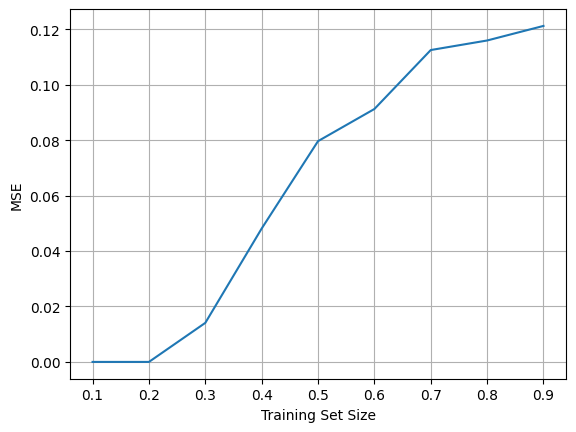

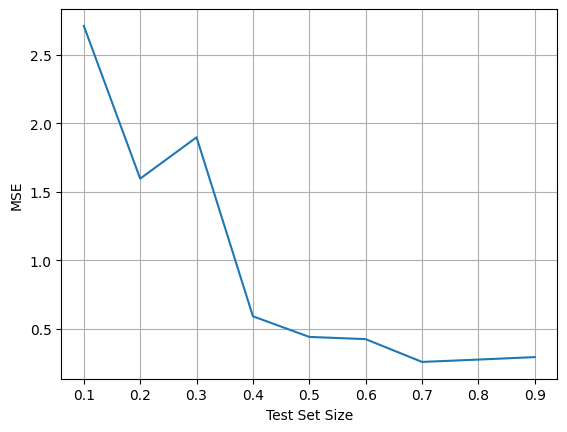

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf


train_sizes = np.linspace(0.1, 0.9, 9)
test_mses=[]
train_mses=[]

for i in train_sizes:
  X_train, X_test, y_train, y_test = train_test_split(variety_ABC, variety_ABC.brix, train_size=i, random_state=5)
  mlm_ABC = smf.ols(lm_formula(X_train, 'brix'), data=X_train).fit()
  test_mse= mean_squared_error(X_test.brix, mlm_ABC.predict(X_test))
  test_mses.append(test_mse)
  train_mse= mean_squared_error(X_train.brix, mlm_ABC.predict(X_train))
  train_mses.append(train_mse)

plt.plot(train_sizes, train_mses, label='train mse')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

plt.plot(train_sizes, test_mses, label='test mse')
plt.xlabel('Test Set Size')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


**Discussion**

Among the MSEs fitted to the models with different proportions of training and test sets, it can be seen from the figure that the MSE is large when the training set is large and the test set is small. We would like to have less MSE for the test set while at the same time avoiding overfitting due to too large a proportion of the test set. It can be seen from the figure that when the training set is 0.8 and the test set is 0.2, both the training set and the test set have low MSE, indicating that this ratio is the minimum size for dividing the dataset

In [ ]:
train_abc, test_abc = train_test_split(variety_ABC, test_size=0.2, random_state=42)

model = smf.ols(formula=lm_formula(variety_ABC, 'brix'), data=train_abc).fit()

test_abc['Y_pred'] = model.predict(test_abc)

mse = mean_squared_error(test_abc['brix'], test_abc['Y_pred'])

print(f'Test MSE in ABC variety: {mse}')


Test MSE in ABC variety: 0.43923885695181414


In [ ]:
train_a, test_a = train_test_split(variety_A, test_size=0.2, random_state=42)

model = smf.ols(formula=lm_formula(variety_A, 'brix'), data=train_a).fit()

test_a['Y_pred'] = model.predict(test_a)

mse = mean_squared_error(test_a['brix'], test_a['Y_pred'])
print(f'Test MSE in A variety: {mse}')


Test MSE in A variety: 292900.5160672651


In [ ]:
train_b, test_b = train_test_split(variety_B, test_size=0.2, random_state=42)

model = smf.ols(formula=lm_formula(variety_B, 'brix'), data=train_b).fit()

test_b['Y_pred'] = model.predict(test_b)

mse = mean_squared_error(test_b['brix'], test_b['Y_pred'])
print(f'Test MSE in B variety: {mse}')


Test MSE in B variety: 0.6008266079898403


In [ ]:
train_c, test_c = train_test_split(variety_C, test_size=0.2, random_state=42)

model = smf.ols(formula=lm_formula(variety_C, 'brix'), data=train_c).fit()

test_c['Y_pred'] = model.predict(test_c)

mse = mean_squared_error(test_c['brix'], test_c['Y_pred'])
print(f'Test MSE in C variety: {mse}')


Test MSE in C variety: 19234.952600061784


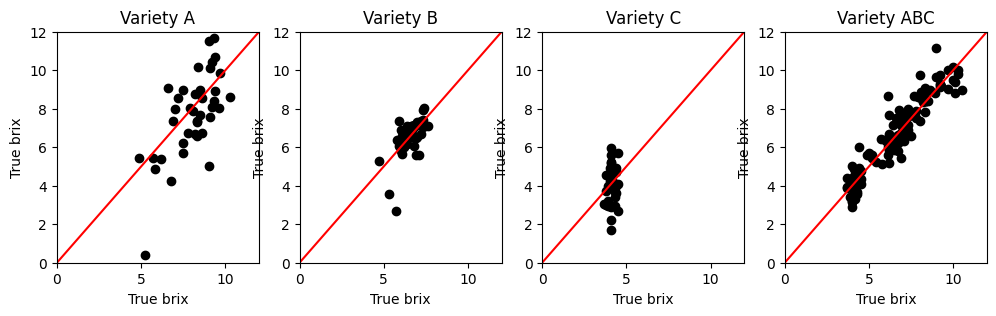

In [ ]:
fig, axes=plt.subplots(1,4, figsize=(12, 3))
axes[0].scatter(test_a['brix'], test_a['Y_pred'], color='black')
axes[0].set_xlabel('True brix')
axes[0].set_ylabel('True brix')
axes[0].set_title('Variety A')
axes[0].set_ylim(0,12)
axes[0].set_xlim(0,12)
axes[0].plot([0,12], [0,12], c='r')

axes[1].scatter(test_b['brix'], test_b['Y_pred'], color='black')
axes[1].set_xlabel('True brix')
axes[1].set_ylabel('True brix')
axes[1].set_title('Variety B')
axes[1].set_ylim(0,12)
axes[1].set_xlim(0,12)
axes[1].plot([0,12], [0,12], c='r')

axes[2].scatter(test_c['brix'], test_c['Y_pred'], color='black')
axes[2].set_xlabel('True brix')
axes[2].set_ylabel('True brix')
axes[2].set_title('Variety C')
axes[2].set_ylim(0,12)
axes[2].set_xlim(0,12)
axes[2].plot([0,12], [0,12], c='r')

axes[3].scatter(test_abc['brix'], test_abc['Y_pred'], color='black')
axes[3].set_xlabel('True brix')
axes[3].set_ylabel('True brix')
axes[3].set_title('Variety ABC')
axes[3].set_ylim(0,12)
axes[3].set_xlim(0,12)
axes[3].plot([0,12], [0,12], c='r')

In [ ]:
variety_ABC.corr()

<ipython-input-8-4d31c3fb78ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  variety_ABC.corr()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V142,V143,V144,V145,V146,V147,V148,V149,V150,brix
V1,1.000000,0.986237,0.960134,0.929033,0.898533,0.875873,0.863219,0.851089,0.831894,0.818577,...,0.526512,0.528802,0.530354,0.531070,0.530090,0.527671,0.523681,0.519673,0.516741,-0.481402
V2,0.986237,1.000000,0.992197,0.973780,0.953610,0.937384,0.927708,0.917675,0.902086,0.889503,...,0.512949,0.515428,0.517184,0.518016,0.516726,0.513428,0.507530,0.501394,0.496661,-0.509582
V3,0.960134,0.992197,1.000000,0.994123,0.982475,0.971186,0.963932,0.956340,0.944112,0.933314,...,0.484251,0.486918,0.488863,0.489814,0.488327,0.484437,0.477285,0.469777,0.463912,-0.516468
V4,0.929033,0.973780,0.994123,1.000000,0.996390,0.989782,0.984789,0.979676,0.970791,0.962460,...,0.451776,0.454652,0.456807,0.457912,0.456342,0.452083,0.444118,0.435735,0.429167,-0.509578
V5,0.898533,0.953610,0.982475,0.996390,1.000000,0.998195,0.995518,0.992266,0.986238,0.979780,...,0.432287,0.435264,0.437541,0.438753,0.437165,0.432711,0.424252,0.415317,0.408288,-0.506602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V147,0.527671,0.513428,0.484437,0.452083,0.432711,0.421430,0.412187,0.396988,0.376692,0.361563,...,0.999407,0.999596,0.999732,0.999834,0.999939,1.000000,0.999829,0.999277,0.998550,-0.746679
V148,0.523681,0.507530,0.477285,0.444118,0.424252,0.412705,0.403340,0.388023,0.367534,0.352309,...,0.998989,0.999141,0.999257,0.999370,0.999574,0.999829,1.000000,0.999809,0.999370,-0.742880
V149,0.519673,0.501394,0.469777,0.435735,0.415317,0.403464,0.393960,0.378514,0.357808,0.342491,...,0.998211,0.998320,0.998409,0.998525,0.998825,0.999277,0.999809,1.000000,0.999872,-0.738695
V150,0.516741,0.496661,0.463912,0.429167,0.408288,0.396177,0.386554,0.371004,0.350118,0.334740,...,0.997325,0.997396,0.997459,0.997574,0.997945,0.998550,0.999370,0.999872,1.000000,-0.735149


<ipython-input-16-9702e573f2e5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.imshow(variety_ABC.corr())


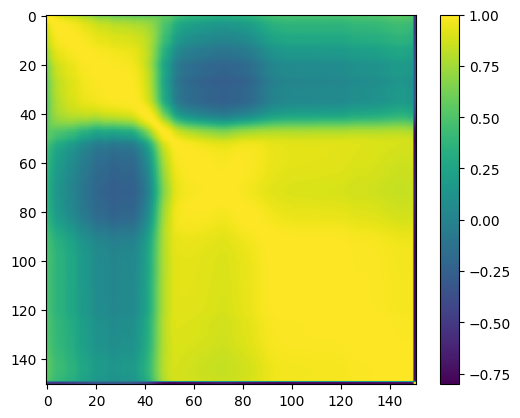

In [ ]:
plt.imshow(variety_ABC.corr())
plt.colorbar()

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(df, dep_var):
  df_no_dep_var = df.drop(dep_var, axis=1)
  exog_df =  sm.add_constant(df_no_dep_var.values)
  vifs = pd.Series( [variance_inflation_factor(exog_df, i) for i in range(1,exog_df.shape[1])  ],
                    index=df_no_dep_var.columns, name = 'vif')
  return(vifs)

vif_ABC=vif(variety_ABC.loc[:,'V1':'brix'], 'brix')
vif_ABC

V1      2.766669e+03
V2      1.588675e+04
V3      2.641313e+04
V4      3.479977e+04
V5      6.434389e+04
            ...     
V146    2.426959e+08
V147    1.513440e+08
V148    1.289125e+08
V149    6.909745e+07
V150    6.866505e+06
Name: vif, Length: 150, dtype: float64

**Discussion**

From the correlation matrix plot, it can be seen that the correlation between many features tends to be close to 1 (yellow area). It indicates that there is a strong positive correlation between them.


A variance inflation factor (VIF) value of 1 indicates that there is no covariance, and the larger the VIF, the stronger the covariance with other variables. As can be seen from the ABC dataset, the VIF value for V1 is 2.76669e+03 (i.e. 2766.69), which is well above the threshold. The VIF values of other features are also high, indicating strong covariance between different features in the ABC data.

# Step 3: dealing with n ≈ p and collinearity

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(variety_ABC.loc[:,'V1':'V150'], variety_ABC.brix, train_size=0.8, random_state=42)

scaler = StandardScaler().fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

 **Subset Selection**

In [ ]:
from sklearn import linear_model
from sklearn.feature_selection import SequentialFeatureSelector

reg_model = linear_model.LinearRegression()

n_feature=np.arange(1,21)
feature_name=[]
for n in n_feature:
  forward_sfs = SequentialFeatureSelector(reg_model,
                                        n_features_to_select=7,
                                        direction='forward',
                                        scoring='neg_mean_squared_error',
                                        cv=10).fit(X_train,y_train)
  feature_name.append(forward_sfs.get_feature_names_out())


print("Forward selection:",feature_name)



Forward selection: [array(['V22', 'V23', 'V52', 'V53', 'V57', 'V58', 'V78'], dtype=object), array(['V22', 'V23', 'V52', 'V53', 'V57', 'V58', 'V78'], dtype=object), array(['V22', 'V23', 'V52', 'V53', 'V57', 'V58', 'V78'], dtype=object), array(['V22', 'V23', 'V52', 'V53', 'V57', 'V58', 'V78'], dtype=object), array(['V22', 'V23', 'V52', 'V53', 'V57', 'V58', 'V78'], dtype=object), array(['V22', 'V23', 'V52', 'V53', 'V57', 'V58', 'V78'], dtype=object), array(['V22', 'V23', 'V52', 'V53', 'V57', 'V58', 'V78'], dtype=object), array(['V22', 'V23', 'V52', 'V53', 'V57', 'V58', 'V78'], dtype=object), array(['V22', 'V23', 'V52', 'V53', 'V57', 'V58', 'V78'], dtype=object), array(['V22', 'V23', 'V52', 'V53', 'V57', 'V58', 'V78'], dtype=object), array(['V22', 'V23', 'V52', 'V53', 'V57', 'V58', 'V78'], dtype=object), array(['V22', 'V23', 'V52', 'V53', 'V57', 'V58', 'V78'], dtype=object), array(['V22', 'V23', 'V52', 'V53', 'V57', 'V58', 'V78'], dtype=object), array(['V22', 'V23', 'V52', 'V53', 'V57', 'V

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

selected_features = forward_sfs.get_support()
lr = LinearRegression()
scores = cross_val_score(lr, X_train.loc[:, selected_features], y_train, cv=3,
                         scoring=make_scorer(mean_squared_error))


mse = scores.mean()
print(f'Mean Squared Error of the selected subset in cross validation: {mse}')


lr.fit(X_train_scaled[:, selected_features], y_train)

train_pred = lr.predict(X_train_scaled[:, selected_features])

test_pred = lr.predict(X_test_scaled[:, selected_features])

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Mean Squared Error of the selected subset on the training set: {train_mse}')
print(f'Mean Squared Error of the selected subset on the test set: {test_mse}')



Mean Squared Error of the selected subset in cross validation: 0.43385792799797446
Mean Squared Error of the selected subset on the training set: 0.4154871844601924
Mean Squared Error of the selected subset on the test set: 0.5753674572105447


**Ridge**

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

lambdas = 10**np.linspace(6,-6,100)

ridge = Ridge(fit_intercept=True)

# Initialize lists to store coefficients and intercepts
coefs, intercepts = [], []

for l in range(len(lambdas)):
    ridge.set_params(alpha = lambdas[l])    # lambda is confusingly called alpha in scikit-learn
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)
    intercepts.append(ridge.intercept_)

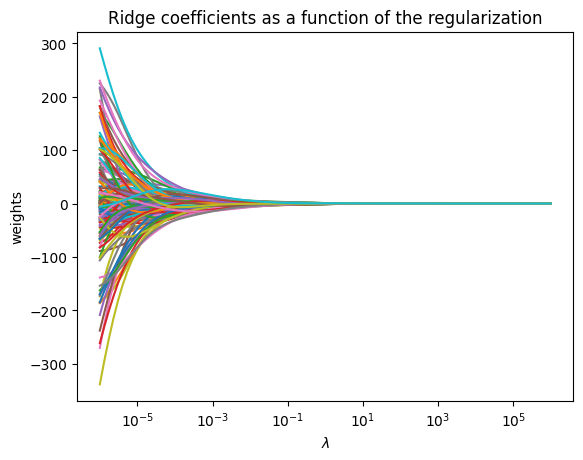

In [ ]:
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('$\lambda$')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

In [ ]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train_scaled, y_train)

train_pred = ridge.predict(X_train_scaled)
test_pred = ridge.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Mean Squared Error of Ridge on training set: {train_mse}')
print(f'Mean Squared Error of Ridge on test set: {test_mse}')

Mean Squared Error of Ridge on training set: 0.28474563066007264
Mean Squared Error of Ridge on test set: 0.3841874437637184


**Lasso**

In [ ]:
# Lasso
lasso = Lasso(max_iter=10000)

lambdas = 10 ** np.linspace(6,-6,100)


coefs, intercepts = [], []

for l in range(len(lambdas)):
    lasso.set_params(alpha=lambdas[l])
    lasso.fit(X_train_scaled,y_train)
    coefs.append(lasso.coef_)
    intercepts.append(lasso.intercept_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.664e-01, tolerance: 1.674e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.529e+00, tolerance: 1.674e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.680e+00, tolerance: 1.674e

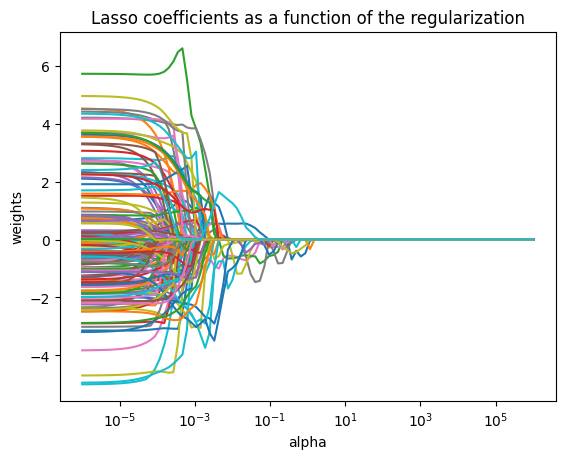

In [ ]:
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.991e-01, tolerance: 1.221e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.232e-01, tolerance: 1.225e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.333e-01, tolerance: 1.161e

Minimum CV MSE of 0.24478670601157368 at lambda: 0.00046415888336127724 (index 77)


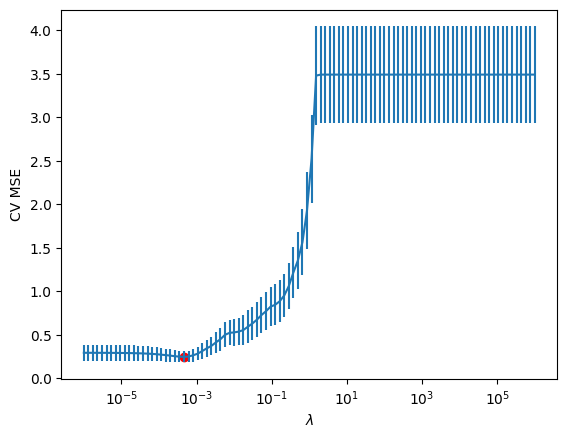

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

mean_scores = np.zeros(len(lambdas))
std_scores = np.zeros(len(lambdas))

for i, lambda_ in enumerate(lambdas):
    cv = cross_val_score(
      Lasso(lambda_, max_iter=10000),
      X_train, y_train, cv=10, scoring='neg_mean_squared_error'
    )
    mean_scores[i] = cv.mean()
    std_scores[i] = cv.std()

print("Minimum CV MSE of {} at lambda: {} (index {})".format(
    np.min(-mean_scores),
    lambdas[np.argmin(-mean_scores)],
    np.argmin(-mean_scores)
))

plt.errorbar(x=lambdas, y=-mean_scores, yerr=std_scores)
mn, opt = np.min(-mean_scores), np.argmin(-mean_scores)
plt.scatter(lambdas[opt],mn,c='red')
plt.xscale("log")
plt.xlabel('$\lambda$')
plt.ylabel('CV MSE')
plt.show()

In [ ]:
lasso.set_params(alpha=lambdas[np.argmin(-mean_scores)])

train_pred = lasso.predict(X_train)
test_pred = lasso.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'MSE on training set in Lasso: {train_mse}')
print(f'MSE on test set in Lasso: {test_mse}')

MSE on training set in Lasso: 0.2229290311182357
MSE on test set in Lasso: 0.20734775680052103


 **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(variety_ABC.loc[:,'V1':'V150'], variety_ABC.brix, train_size=0.8, random_state=42)

scaler = StandardScaler().fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train_scaled, y_train)


y_pred_train = dt.predict(X_train_scaled)
y_pred_test = dt.predict(X_test_scaled)


train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Train MSE in DT:", train_mse)
print("Test MSE in DT:", test_mse)

Train MSE in DT: 1.6366408822012692e-32
Test MSE in DT: 0.8046280991735536


**Random Forests**

In [ ]:
# Random Forests regression
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(bootstrap=True,
    max_depth=10,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42)


rf.fit(X_train_scaled, y_train)


y_pred_train = rf.predict(X_train_scaled)
y_pred_test = rf.predict(X_test_scaled)


mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Training MSE in RF: {mse_train}')
print(f'Test MSE in RF: {mse_test}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Training MSE in RF: 0.06424481240888036
Test MSE in RF: 0.524057611099438


**PCA**

In [ ]:
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [ ]:
pca = PCA(n_components=4,random_state=42)
pca_result = pca.fit_transform(X_train_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4'],index=X_train.index)
pca_df.head()

,PC1,PC2,PC3,PC4
A001_10,-8.314959,2.828206,1.491532,-1.072059
C004_2,14.226985,-4.485034,-1.520415,3.849466
C024_3,13.119653,-4.469147,-0.029498,1.285837
A028_1,-6.583784,11.401961,-2.643499,4.145604
A017_6,-8.188399,-0.330042,-0.031935,0.828774


In [ ]:
pca_fit = PCA(n_components=4,random_state=42).fit(X_train_scaled)

pca_loadings = pd.DataFrame(pca_fit.components_.T, index=X_train.columns, columns=['V1', 'V2', 'V3', 'V4'])

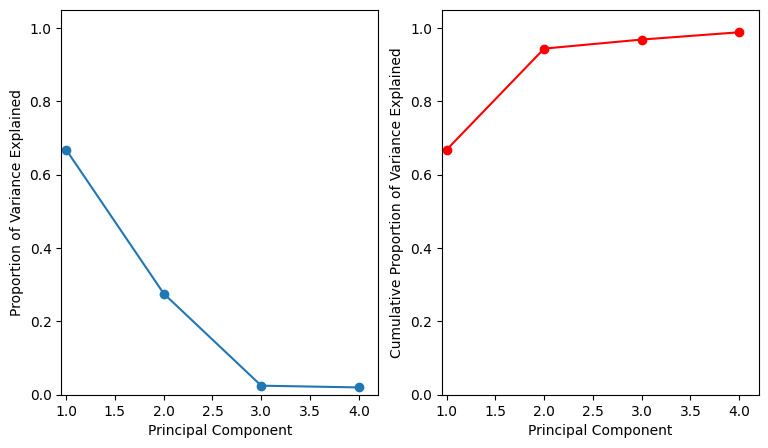

In [ ]:
def variance_plots(pca, nr_pcs):
  """
  Plots the proportion variance explained (PVE) as well as the cumulative PVE.
  pca is pca object obtained from PCA()
  nr_pcs is the number of PCs to be used
  """
  fig , (ax1,ax2) = plt.subplots(1,2, figsize=(9,5))

  # Left plot
  ax1.plot(list(range(1, nr_pcs+1)), pca.explained_variance_ratio_[:nr_pcs], '-o')
  ax1.set_ylabel('Proportion of Variance Explained')
  ax1.set_ylim(ymin=0.0, ymax=1.05)

  # Right plot
  ax2.plot(list(range(1, nr_pcs+1)), np.cumsum(pca.explained_variance_ratio_[:nr_pcs]), '-ro')
  ax2.set_ylabel('Cumulative Proportion of Variance Explained')
  ax2.set_ylim(ymin=0.0, ymax=1.05)

  for ax in fig.axes:
      ax.set_xlabel('Principal Component')
      ax.set_xlim(0.95, nr_pcs+0.2)

variance_plots(pca_fit,4)

In [ ]:
print(pca_loadings)

            V1        V2        V3        V4
V1    0.050738  0.094401  0.178122 -0.211776
V2    0.048864  0.108055  0.156422 -0.194117
V3    0.045630  0.117734  0.141963 -0.179415
V4    0.041906  0.125269  0.133343 -0.160806
V5    0.039572  0.130309  0.126221 -0.138125
...        ...       ...       ...       ...
V146  0.097193  0.011872  0.008667  0.096827
V147  0.097177  0.011101  0.009389  0.097232
V148  0.097199  0.009496  0.011567  0.097257
V149  0.097194  0.007801  0.014328  0.097244
V150  0.097165  0.006472  0.017046  0.097271

[150 rows x 4 columns]


In [ ]:
lr = LinearRegression()

X_train_pca = pca.fit_transform(X_train_scaled)
lr.fit(X_train_pca, y_train)

X_test_pca = pca.transform(X_test_scaled)

y_pred_train = lr.predict(X_train_pca)
y_pred_test = lr.predict(X_test_pca)


mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)


print(f'MSE on training set in PCA: {mse_train}')
print(f'MSE on test set in PCA: {mse_test}')

MSE on training set in PCA: 0.8736569318133961
MSE on test set in PCA: 1.1515796262347022


**PLS**

In [ ]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=4)

pls.fit(X_train_scaled, y_train)

y_pred_train = pls.predict(X_train_scaled)
y_pred_test = pls.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)


print(f'MSE on training set in PLS: {mse_train}')
print(f'MSE on test set in PLS: {mse_test}')

MSE on training set in PLS: 0.588433078644096
MSE on test set in PLS: 0.7294278384980698


# [Bonus] Getting you started with neural networks for regression
**NB: start using a neural network for the sweetness prediction only when you are finished with the other methods and with the report.**

In [ ]:
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Creating some fake data as an example

In [ ]:
n=1000
x1 = 2* (np.random.rand(n)-0.5)
x2 = 2* (np.random.rand(n)-0.5)
y = 0.5*x1 + 0.25*x2 +0.5 + 0.1*np.random.randn(n)

my_data = pd.DataFrame({'x1':x1,'x2':x2,'y':y})

X_train, X_test, y_train, y_test = train_test_split(my_data[['x1','x2']], my_data['y'], test_size=0.25)

Setting up a multi-layered network: Input is set to the number of columns in C_train. The first hidden layer has 64 neurons with sigmoid activation function, the second hidden layer has 32 neurons with sigmoid activation function, and the output layer has one output neuron with a linear activation function.

In [ ]:
modnn = Sequential()
modnn.add( Dense(units=64, activation='sigmoid', input_shape=(X_train.shape[-1],) ) )
modnn.add( Dense(units=32, activation='sigmoid' ))
modnn.add( Dense(units=1, activation='linear'  ) )

modnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                192       
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


Compiling the network, setting rmsprop as optimized, mean square error as loss function (needed for regression) and getting MSE as a metric.

We save the initial weights, so that we can run it multiple time from the same start point

In [ ]:
modnn.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
weights_initial = modnn.get_weights()

Training the network. The code includes a class to show the loss during training

In [ ]:
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1

        if(self.i%10 == 0):
          clear_output(wait=True)
          plt.plot(self.x, self.losses, label="loss")
          plt.plot(self.x, self.val_losses, label="val_loss")
          plt.legend()
          plt.show();

plot_losses = PlotLosses()

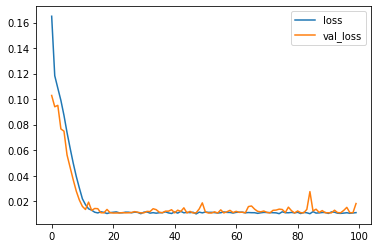

In [ ]:
modnn.set_weights(weights_initial)
nn_fit = modnn.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[plot_losses], verbose=0)

Getting predictions on the test set and calculating the MSE:

Test MSE: 0.015627775609864118


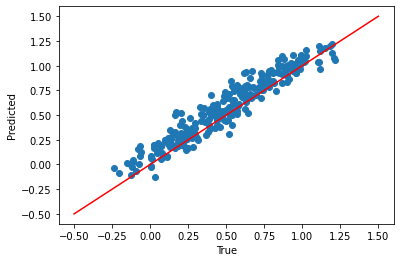

In [ ]:

# Use the NN to predict the response for the test set
y_pred = modnn.predict(X_test)

# Calculate the MSE and print
test_mse = mean_squared_error(y_test, y_pred)
print ("Test MSE:", test_mse)

# Make a plot with the true and predicted data
plt.scatter(y_test, y_pred)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.plot([-0.5,1.5],[-0.5,1.5],'r-')
plt.show()